# Us de l'algoritme de Supervised Machine Learning kNN per a la regressi√≥ de la qualitat de certs vins

* German Bueno Lozano
* Arnau Gonzalez Almirall

En aquesta primera part del projecte de l'assignatura entrenarem una kNN per a la regressi√≥ de la qualitat de certs Vins.

**Justificacio del dataset triat**: La kNN es un algoritme que es basa en distancies euclidies per a fer la clasificacio o regressio de dades. Quan "arriba" una nova dada es busca la menor distancia entre "k" veins. D'aquesta manera podem fer una regressio o qualificacio de les dades.

Amb l'experiencia previa d'haber fet servir la kNN per a clasificacio de imatges amb kNN a l'associacio PUCRA, ens donem conta que contra mes definides queden les clases en el conjunt de train, millor si no, l'algorisme es molt susceptible de confondre clases.

In [26]:
!pip install ucimlrepo

# data exploration

En aquest cas farem servir la llibreria de la UCI per importar les dades, per sort, ens donen ja directament per una banda la matriu X y per altre el vector y

In [144]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [46]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
df=pd.concat([X,y],axis=1)

In [31]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

Comprovem com anem de NaN

In [51]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
#Escalar las caracter√≠sticas (PCA es sensible a la escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

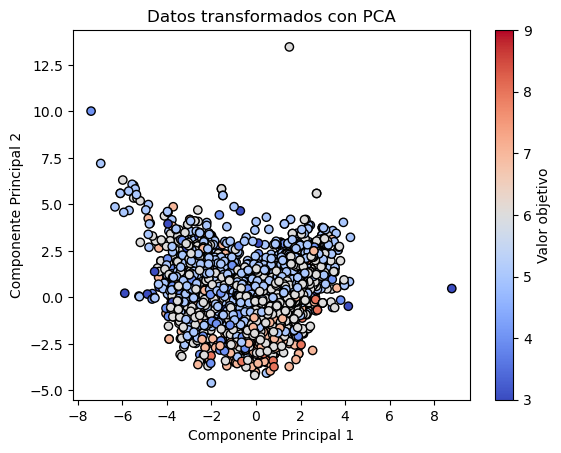

In [71]:
# Visualizar los datos transformados con PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(y), cmap='coolwarm', edgecolors='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos transformados con PCA')
plt.colorbar(label='Valor objetivo')
plt.show()

*apreciacion*: no hay una gran cantidad de outliers, pero algunos si que se aprecian

# Entrenament de la kNN per a fer la reggressi√≥

**Justificacio clau, per mostrar que entenem el concepte:** Perque fem servir X_scaled en train_test_split y no X_PCA?
üìå **Per qu√® el PCA no √©s necessari en aquest cas?**  
1Ô∏è‚É£ **Poques caracter√≠stiques (11 en total)** ‚Üí El dataset no √©s massa gran en dimensions, per tant, **kNN no pateix la "maledicci√≥ de la dimensionalitat"**.  
2Ô∏è‚É£ **No hi ha caracter√≠stiques altament redundants** ‚Üí Tot i que algunes variables poden estar correlacionades (per exemple, `total sulfur dioxide` i `free sulfur dioxide`), la regressi√≥ kNN pot manejar-les sense problemes.  
3Ô∏è‚É£ **El PCA pot fer que perdis interpretabilitat** ‚Üí Les components principals **no tenen un significat f√≠sic clar** (com `acidity` o `alcohol`), cosa que dificulta la interpretaci√≥ dels resultats.  
4Ô∏è‚É£ **kNN ja √©s un m√®tode basat en dist√†ncia** ‚Üí El PCA transforma les dades en una nova base, cosa que pot canviar la manera en qu√® kNN mesura les dist√†ncies entre punts.

üìå **Quan podria ser √∫til el PCA per a Wine Quality**  
‚úÖ **Si el dataset tingu√©s moltes m√©s variables** ‚Üí Si en lloc de 11 variables n'hi hagu√©s 50 o 100, el PCA podria ajudar a reduir la dimensionalitat.  
‚úÖ **Si hi hagu√©s una alta correlaci√≥ entre moltes caracter√≠stiques** ‚Üí En aquest cas, el PCA ajudaria a evitar que el model es "distraigu√©s" amb informaci√≥ redundant.  
‚úÖ **Si es vol fer una comparaci√≥ de models** ‚Üí Pots provar amb i sense PCA i comparar el rendiment.

Exemple on podriem fer PCA si Wine Quality tingues moltes dimensions?:

Un exemple de caracter√≠stiques que poden tenir **alta correlaci√≥** en el dataset de **Wine Quality** s√≥n:  

üîπ **Di√≤xid de sofre total (`total_sulfur_dioxide`)** i **Di√≤xid de sofre lliure (`free_sulfur_dioxide`)** ‚Üí Com que el **di√≤xid de sofre lliure** forma part del **di√≤xid de sofre total**, √©s molt probable que estiguin fortament correlacionats.  

üîπ **Densitat (`density`)** i **Sucre residual (`residual_sugar`)** ‚Üí A mesura que augmenta la quantitat de sucre residual en el vi, tamb√© pot augmentar la seva densitat.  

üîπ **Acidesa fixa (`fixed_acidity`)** i **Acidesa c√≠trica (`citric_acid`)** ‚Üí Alguns tipus de vins amb m√©s acidesa fixa tamb√© poden tenir nivells m√©s alts d‚Äô√†cid c√≠tric, cosa que pot generar una correlaci√≥ entre aquestes dues variables.  

üîπ **Sulfats (`sulphates`)** i **Di√≤xid de sofre total (`total_sulfur_dioxide`)** ‚Üí Ambd√≥s s√≥n utilitzats com a conservants en el vi i poden estar relacionats.  

Si foa necessari, podriem calcular la **matriu de correlaci√≥** del dataset i veure exactament quines variables estan m√©s relacionades! üöÄ

Aixo ja ho hem hagut de arribar a fer en altres projectes, pero per 11 dimensions que te el dataset no ho veiem necessari


In [110]:
#Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [132]:
def regression(clf, tuning=False):
  clf.fit(X_train, y_train)
  if tuning:
    print('best pars:', clf.best_params_)
  preds = pd.Series(clf.predict(X_test).flatten(),name='preds')
  reals = pd.Series(y_test.values.ravel(), name='target')
  print('mse:', mean_absolute_error(reals,preds))
  print('R2:', r2_score(reals,preds))

In [138]:
%%time
pars = {'n_neighbors': [1, 3, 5, 7, 11], 'weights': ['uniform', 'distance']}
regression(GridSearchCV(KNeighborsRegressor(), pars), True)

best pars: {'n_neighbors': 11, 'weights': 'distance'}
mse: 0.4019431232479584
R2: 0.4918134935440083
CPU times: total: 1.45 s
Wall time: 1.43 s


com es pot observar, no obtenim una gran regressi√≥ (r^2 baixa) tot i haber fet servir GridSearchCV, anem a provar amb altres metodes

In [146]:
regression(LinearRegression())

mse: 0.5658710079723465
R2: 0.25976731297713973


## Justificacio del baix R^2 

### 1. **Elecci√≥ del model (kNN i Linear Regression)**
   - **kNN:** Tot i que kNN pot ser efica√ß per a algunes tasques de regressi√≥, no sempre √©s el model m√©s adequat per a tots els conjunts de dades. √âs sensible a la selecci√≥ del valor de \( k \), el qual pot afectar significativament els resultats. Si \( k \) √©s massa petit, el model pot sobreajustar-se (overfitting), mentre que si √©s massa gran, el model pot ser massa simple (underfitting).
   - **Linear Regression:** Aquest model assumeix que la relaci√≥ entre les caracter√≠stiques i la variable objectiu √©s lineal. Si les relacions no s√≥n lineals, Linear Regression no ser√† capa√ß de capturar la complexitat del conjunt de dades, el que pot resultar en un \( R^2 \) baix.

### 2. **Selecci√≥ de caracter√≠stiques**
   Tot i que s'ha indicat que s'han conservat totes les dimensions, √©s important verificar si totes les caracter√≠stiques s√≥n realment rellevants per a la predicci√≥ de la qualitat del vi. Algunes caracter√≠stiques poden ser irrellevants o redundants. L'√∫s de t√®cniques de selecci√≥ de caracter√≠stiques, com *SelectKBest* o *PCA* (An√†lisi de Components Principals), pot ajudar a millorar el rendiment mitjan√ßant la reducci√≥ de la dimensionalitat.

### 3. **Hiperpar√†metres de kNN**
   El rendiment de kNN dep√®n en gran mesura de la selecci√≥ del valor de \( k \) i de la m√®trica de dist√†ncia utilitzada. Si \( k \) √©s massa petit, el model pot ser excessivament sensible al soroll, mentre que si √©s massa gran, pot perdre informaci√≥ important. 
   - Es recomana utilitzar validaci√≥ creuada per determinar el valor √≤ptim de \( k \).
   - Provar diferents m√®triques de dist√†ncia, com *Euclidean*, *Manhattan* o *Minkowski*, pot millorar el rendiment.

### 4. **Escalat de dades**
   Tot i que s'ha utilitzat un escalador est√†ndard, √©s important tenir en compte que kNN √©s molt sensible a l'escalat de les caracter√≠stiques, ja que es basen en el c√†lcul de dist√†ncies entre punts. Si les dades no estan escalades correctament, les dist√†ncies potser no reflectiran adequadament la relaci√≥ entre les mostres.
   
   Per a Linear Regression, l'escalat de les dades no √©s tan cr√≠tic, per√≤ √©s recomanable per comparar models i obtenir una millor interpretaci√≥ dels coeficients.

### 5. **Distribuci√≥ de les dades i sorolls**
   En el conjunt de dades de "Wine Quality", la distribuci√≥ de la variable objectiu (qualitat del vi) pot estar esbiaixada o pot presentar una variabilitat dif√≠cil de modelar. Si la qualitat del vi t√© una distribuci√≥ no lineal o est√† massa dispersa, pot resultar dif√≠cil per a kNN i Linear Regression modelar adequadament aquesta variabilitat.

   **Recomanacions**:
   - **Revisar la distribuci√≥ de la variable objectiu**. Si est√† esbiaixada, una transformaci√≥ (com un logaritme o una normalitzaci√≥) podria millorar els resultats.
   - **Eliminaci√≥ o tractament del soroll**. Les dades podrien contenir errors o valors at√≠pics que afecten el rendiment del model. √âs aconsellable realitzar an√†lisis per identificar valors at√≠pics o utilitzar t√®cniques de detecci√≥ de valors an√≤mals.

### 6. **Model de base per a la comparaci√≥**
   Un \( R^2 \) de 0.49 no √©s necess√†riament dolent, depenent de la comparaci√≥ amb un model de refer√®ncia. Per exemple, un model senzill que predigui la mitjana de la variable objectiu per a totes les mostres podria servir com a base, i si el model no millora significativament sobre aquest punt de partida, pot ser necessari explorar altres enfocaments (com arbres de decisi√≥, Random Forest, o m√®todes de boosting).

### Passos per millorar el model:
1. **Optimitzar el valor de \( k \) en kNN** mitjan√ßant validaci√≥ creuada.
2. **Valorar si la relaci√≥ entre les caracter√≠stiques i la variable objectiu √©s lineal**, i en cas contrari, provar models m√©s complexos com Random Forest, Gradient Boosting, o Support Vector Machines (SVM).
3. **Revisar la selecci√≥ de caracter√≠stiques** per eliminar variables irrellevants o altament correlacionades.
4. **Considerar transformacions de la variable objectiu** si la distribuci√≥ de la mateixa √©s esbiaixada.
5. **Comprovar el comportament del model amb altres t√®cniques d'escalat**, com Min-Max Scaling o Robust Scaling.

Si els problemes persisteixen, es podria intentar amb models m√©s complexos que puguin capturar relacions no lineals, com un **Random Forest Regressor** o un **Gradient Boosting Regressor**.